In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.neighbors
# Load the data
oecd_bli_real = pd.read_excel("oecd_2015.xlsx")
oecd_bli_synt = pd.read_excel("sample.xlsx")

In [2]:
oecd_bli_real.head()

,Country,Life Satisfaction,GDP
0,Mexico,6.9,9690
1,Türkiye,7.5,10930
2,Poland,7.4,12210
3,Hungary,4.8,12370
4,Chile,7.3,14670


In [3]:
oecd_bli_synt.head()

,Country,GDP,Life Satisfaction
0,Luxembourg,10797,4.156751
1,Iceland,11871,4.256590
2,United States,12496,4.375762
3,Belgium,16921,4.384394
4,Netherlands,17877,4.388405


In [4]:
X_real = np.c_[oecd_bli_real["GDP"]]
y_real = np.c_[oecd_bli_real["Life Satisfaction"]]
X_synt = np.c_[oecd_bli_synt["GDP"]]
y_synt = np.c_[oecd_bli_synt["Life Satisfaction"]]

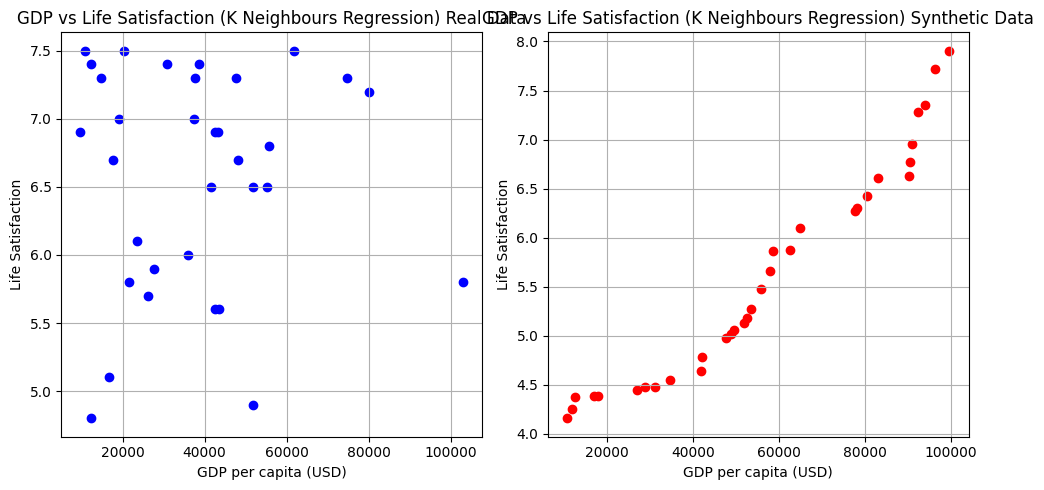

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2 , figsize = (10,5))

ax1.scatter(X_real, y_real, color='blue')
ax1.set_title('GDP vs Life Satisfaction (K Neighbours Regression) Real Data')
ax1.set_xlabel('GDP per capita (USD)')
ax1.set_ylabel('Life Satisfaction')
ax1.grid(True)

ax2.scatter(X_synt, y_synt, color='red')
ax2.set_title('GDP vs Life Satisfaction (K Neighbours Regression) Synthetic Data')
ax2.set_xlabel('GDP per capita (USD)')
ax2.set_ylabel('Life Satisfaction')
ax2.grid(True)

plt.tight_layout()
plt.show()

In [6]:
model_real = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
model_synt = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
# Train the model
model_real.fit(X_real, y_real)
model_synt.fit(X_synt, y_synt)

KNeighborsRegressor(n_neighbors=3)

In [7]:
X_new = [[10000]]
print(model_real.predict(X_new))
print(model_synt.predict(X_new))

[[7.26666667]]
[[4.2630344]]


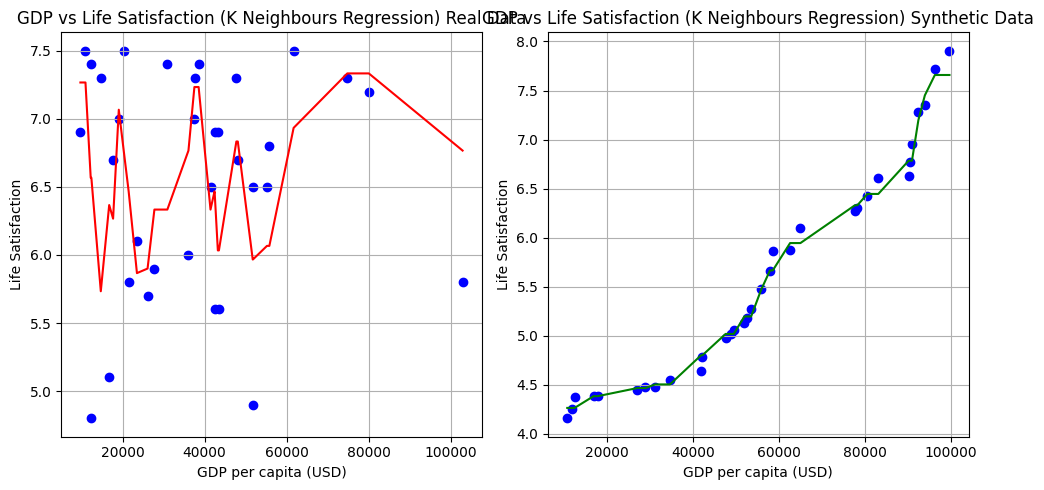

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2 , figsize = (10,5))

ax1.scatter(X_real, y_real, color='blue')
ax1.plot(X_real, model_real.predict(X_real), color='red')
ax1.set_title('GDP vs Life Satisfaction (K Neighbours Regression) Real Data')
ax1.set_xlabel('GDP per capita (USD)')
ax1.set_ylabel('Life Satisfaction')
ax1.grid(True)

ax2.scatter(X_synt, y_synt, color='blue')
ax2.plot(X_synt, model_synt.predict(X_synt), color='green')
ax2.set_title('GDP vs Life Satisfaction (K Neighbours Regression) Synthetic Data')
ax2.set_xlabel('GDP per capita (USD)')
ax2.set_ylabel('Life Satisfaction')
ax2.grid(True)

plt.tight_layout()
plt.show()